In [1]:
import pandas as pd # pandas will be referred to as pd below
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

/home/ayla/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Load files: Data comes from two different csv files: one for GDP data and one for Mortality Rate.

GDP Data...

In [2]:
data_GDP= pd.read_csv('GDP.csv')
data_GDP.columns

Index(['Area', 'Year', 'GDP'], dtype='object')

In [3]:
#Selecting columns:
data_GDP['Area'].head(3)

0    Abkhazia
1    Abkhazia
2    Abkhazia
Name: Area, dtype: object

In [4]:
#Selecting rows:
data_GDP[:5]

,Area,Year,GDP
0,Abkhazia,2005,NaN
1,Abkhazia,2006,NaN
2,Abkhazia,2007,NaN
3,Abkhazia,2008,NaN
4,Abkhazia,2009,NaN


In [5]:
#Selecting columns & rows:
data_GDP['Area'][:5]

0    Abkhazia
1    Abkhazia
2    Abkhazia
3    Abkhazia
4    Abkhazia
Name: Area, dtype: object

In [6]:
#Selecting multiple columns:
data_GDP[['Area','GDP']][:5]

,Area,GDP
0,Abkhazia,NaN
1,Abkhazia,NaN
2,Abkhazia,NaN
3,Abkhazia,NaN
4,Abkhazia,NaN


In [7]:
# Remove missing values: 
# dropna():dropped DataFrame
print('GDP original length: '+ str(len(data_GDP)))
data_GDP_NoMissing= data_GDP.dropna() 

# default drop method: if all values are NA, drop that label
print('GDP new length: '+ str(len(data_GDP_NoMissing)))

# OR, You can replace NA with a scalar value:
# data_GDP= data_GDP.fillna(0)

# You can use pd.isnull and pd.notnull to test for missing data (NaN).

GDP original length: 51917
GDP new length: 48892


In [8]:
# be careful about the indexes:
data_GDP_NoMissing.index # note that the index does not start from zero!
# data_GDP_NoMissing.iloc[0] # by index position
# data_GDP_NoMissing.loc[0] # by index label (error if such a label does not exist)
# you can set the index as you like:

data_GDP_NoMissing.index= range(len(data_GDP_NoMissing))
data_GDP_NoMissing.index


RangeIndex(start=0, stop=48892, step=1)

In [9]:
# A note on numpy.nan: recode missing values to python missing (NaN)
# sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, numpy.nan)

MortalityRate Data...

In [10]:
data_MortalityRate= pd.read_csv('MortalityRate.csv')
print(data_MortalityRate.columns)

Index(['Area', 'Year', 'Under_five_mortality'], dtype='object')


In [11]:
print('Mortality rate original length: '+ str(len(data_MortalityRate)))

data_MortalityRate_NoMissing= data_MortalityRate.dropna()
print('Mortality rate new length: '+ str(len(data_MortalityRate_NoMissing)))

Mortality rate original length: 68643
Mortality rate new length: 33500


Merge two data frames:
Inner joins yield a DataFrame that contains only rows where the value being joined (acc to column names) exists in BOTH tables. 
Now, data contains no empty rows

In [12]:
data = pd.merge(left= data_GDP_NoMissing, right= data_MortalityRate_NoMissing)
print (data.head(5))

          Area  Year      GDP  Under_five_mortality
0  Afghanistan  1800  472.053                468.58
1  Afghanistan  1801  472.053                468.58
2  Afghanistan  1802  472.053                468.58
3  Afghanistan  1803  472.053                468.58
4  Afghanistan  1804  472.053                468.58


In [13]:
print('Data length: '+ str(len(data)))

Data length: 33447


In [14]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            33437, 33438, 33439, 33440, 33441, 33442, 33443, 33444, 33445,
            33446],
           dtype='int64', length=33447)

In [15]:
# Alternatively, you could do dropna like below:
data = pd.merge(left= data_GDP, right= data_MortalityRate)
print (data.head(5))
print('Lenghth of the original dataframe: '+str(len(data)))
data= data.dropna(subset =['GDP','Under_five_mortality'], how='any')

data= data.reset_index(drop=True) # not to save old index as a column
print('Lenghth of the new dataframe: '+str(len(data)))
print(data.head(3))
data.index

       Area  Year  GDP  Under_five_mortality
0  Abkhazia  2005  NaN                   NaN
1  Abkhazia  2006  NaN                   NaN
2  Abkhazia  2007  NaN                   NaN
3  Abkhazia  2008  NaN                   NaN
4  Abkhazia  2009  NaN                   NaN
Lenghth of the original dataframe: 50617
Lenghth of the new dataframe: 33447
          Area  Year      GDP  Under_five_mortality
0  Afghanistan  1800  472.053                468.58
1  Afghanistan  1801  472.053                468.58
2  Afghanistan  1802  472.053                468.58


RangeIndex(start=0, stop=33447, step=1)

Converts to numeric :lets python recognize these columns as numeric so that some numeric operations can be done

In [16]:
data['Year']= pd.to_numeric(data['Year'])
data['GDP']= pd.to_numeric(data['GDP'])
data['Under_five_mortality']= pd.to_numeric(data['Under_five_mortality'])

Frequency distributions...

For column: Area, Counts and Percentages

In [17]:
# Which area has the highest number of records?
countArea= data['Area'].value_counts(sort= True, ascending=False, dropna=False) # sort= True
print(countArea.head(5))
print()
perArea= data['Area'].value_counts(sort= True, ascending=False, dropna=False, normalize=True)
print(perArea.head(5))
print()
print ('Number of Different Areas: '+ str(len(countArea)))
print ('Number of observations for the Area column:'+ str(len(data['Area'])))


Sweden         263
Guinea         214
Yemen, Rep.    214
Afghanistan    209
Zambia         207
Name: Area, dtype: int64

Sweden         0.007863
Guinea         0.006398
Yemen, Rep.    0.006398
Afghanistan    0.006249
Zambia         0.006189
Name: Area, dtype: float64

Number of Different Areas: 197
Number of observations for the Area column:33447


For column: Year, Counts and Percentages

In [18]:
print ('Year ranges from '+ str(data['Year'].min())+' and to '+ str(data['Year'].max()) )
countYear= data['Year'].value_counts(sort= False, dropna=False)
print(countYear.head(5))
perYear= data['Year'].value_counts(sort= False, dropna=False, normalize=True)
print(perYear.head(5))
print ('Number of Different Years: '+ str(len(countYear)))

Year ranges from 1751 and to 2013
1760      1
1792      1
1824    156
1856    152
1888    155
Name: Year, dtype: int64
1760    0.000030
1792    0.000030
1824    0.004664
1856    0.004545
1888    0.004634
Name: Year, dtype: float64
Number of Different Years: 263


For column: GDP, Counts and Percentages

In [19]:
countGDP= data['GDP'].value_counts(sort= False, dropna=False) 
# dropna=False  required, otherwise python does not show mising values

print(countGDP.head(5))
perGDP= data['GDP'].value_counts(sort= False, dropna=False, normalize=True)
print(perGDP.head(5))
print ('Number of Different GDP values: '+ str(len(countGDP)))

559.938     1
681.206     1
2583.565    1
800.967     1
1362.184    1
Name: GDP, dtype: int64
559.938     0.00003
681.206     0.00003
2583.565    0.00003
800.967     0.00003
1362.184    0.00003
Name: GDP, dtype: float64
Number of Different GDP values: 31117


For column: Under_five_mortality, Counts and Percentages

In [20]:
countMortality= data['Under_five_mortality'].value_counts(sort= False, dropna=False)
print(countMortality.head(5))
perMortality= data['Under_five_mortality'].value_counts(sort= False, dropna=False, normalize=True)
print(perMortality.head(5))
print ('Number of Different mortality rates: '+ str(len(countMortality)))

2.5     1
3.5     6
4.0    19
5.0    19
6.5    19
Name: Under_five_mortality, dtype: int64
2.5    0.000030
3.5    0.000179
4.0    0.000568
5.0    0.000568
6.5    0.000568
Name: Under_five_mortality, dtype: float64
Number of Different mortality rates: 9094


Manipulate data:
Remove rows where either GDP or Under_five_mortality column is NaN: Should return the same dataframe, because above merge operation has already done this!

In [21]:
data= data.dropna(subset =['GDP','Under_five_mortality'], how='any')

data= data.reset_index(drop=True) # not to save old index as a column
print('Lenghth of the new dataframe: '+str(len(data)))

Lenghth of the new dataframe: 33447


# Now, Create GDP groups, describe and visualize data:

In [22]:
print ('GDP ranges from '+ str(data['GDP'].min())+' and to '+ str(data['GDP'].max()) )
data['GDP'].describe()

GDP ranges from 281.909 and to 111654.831


count     33447.000000
mean       3534.398243
std        7017.823349
min         281.909000
25%         657.420000
50%        1156.182000
75%        2936.625000
max      111654.831000
Name: GDP, dtype: float64

In [23]:
# GDP column keeps continuous quantitative variables.
# In order to create GDP groups, we need to generate partitions. 
# Below, we call the "cut " method. Note that the first cut is (280, 1000]
data['GDPGroup']= pd.cut(data.GDP, [280,1000,2000,5000,10000,50000,120000]) 
# no need to sort the data frame.

print(len(data))
print(len(data['GDPGroup']))


33447
33447


Frequency distributions for the group...

In [24]:
data['GDPGroup']= data['GDPGroup'].astype('category')
data['GDPGroup'].describe()
# "GDPGroup" column keeps a categorial variable (not quantitative):
# astype() method: Cast object to input numpy.dtype

count           33447
unique              6
top       (280, 1000]
freq            14885
Name: GDPGroup, dtype: object

In [25]:
GDPGroupP= data['GDPGroup'].value_counts(sort= False, normalize= True) 
# value_counts() should make more sense now
print(GDPGroupP)

(280, 1000]        0.445032
(1000, 2000]       0.224086
(2000, 5000]       0.167339
(5000, 10000]      0.080874
(10000, 50000]     0.079917
(50000, 120000]    0.002751
dtype: float64


In [26]:
# print(pd.crosstab(data['GDPGroup'], data['GDP'])) 
# crosstab() method: shows which GDP valus were put into which GDP group

## Univariate (related to only 1 variable) bar graph for categorical GDPGroup varaible:

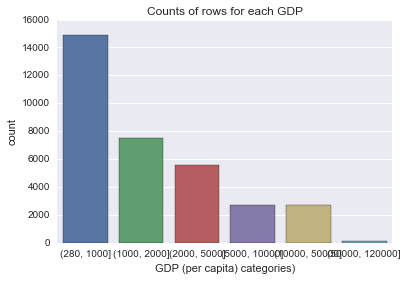

In [27]:
seaborn.countplot(x= 'GDPGroup', data= data)
plt.xlabel('GDP (per capita) categories)')
plt.title('Counts of rows for each GDP')
plt.show()

Univariate histogram for quantitative GDP varaible:

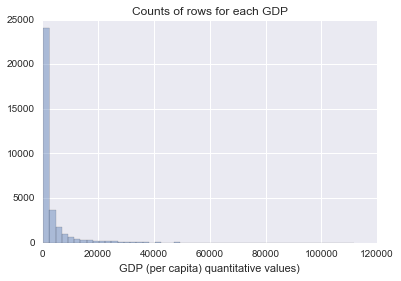

In [28]:
seaborn.distplot(data['GDP'].dropna(), kde= False)
plt.xlabel('GDP (per capita) quantitative values)')
plt.title('Counts of rows for each GDP')

# Create Under_five_mortality groups, describe and visualize:

In [29]:
print ('Under_five_mortality ranges from '+ str(data['Under_five_mortality'].min())+' and to '+ 
       str(data['Under_five_mortality'].max()) )
data['Under_five_mortality'].describe()

Under_five_mortality ranges from 2.0 and to 756.29


count    33447.000000
mean       293.472086
std        166.042344
min          2.000000
25%        125.635000
50%        369.210000
75%        425.105000
max        756.290000
Name: Under_five_mortality, dtype: float64

In [30]:
data['MortalityGroup']= pd.cut(data.Under_five_mortality, [2,50,100,200,500,800]) 

In [31]:
data['MortalityGroup']= data['MortalityGroup'].astype('category')
data['MortalityGroup'].describe()

count          33446
unique             5
top       (200, 500]
freq           20951
Name: MortalityGroup, dtype: object

In [32]:
MG= data['MortalityGroup'].value_counts(sort= False, normalize= True)
print(MG)

(2, 50]       0.146231
(50, 100]     0.073310
(100, 200]    0.102012
(200, 500]    0.626394
(500, 800]    0.052023
dtype: float64


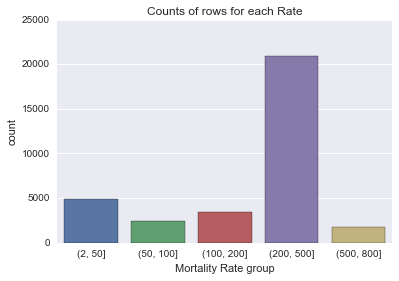

In [33]:
seaborn.countplot(x= 'MortalityGroup', data= data)
plt.xlabel('Mortality Rate group')
plt.title('Counts of rows for each Rate')
plt.show()

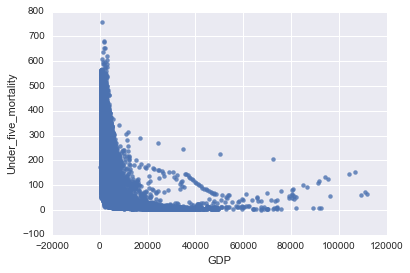

In [34]:
seaborn.regplot(x= "GDP", y= "Under_five_mortality", fit_reg= False, data= data)

Use data for only years after 2000

In [76]:
data2= data[data['Year']>=2000]

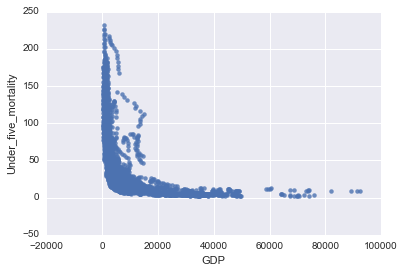

In [77]:
seaborn.regplot(x= "GDP", y= "Under_five_mortality", fit_reg= False, data= data2)

Create a factor plot, but first convert the "Under_five_mortality" variable to a two-level categorical variable:

If the Under_five_mortality is above 50 (per 1000) then I will accept it as 1:

In [78]:
MG= data['MortalityGroup'].value_counts(sort= False, normalize= True)
print(MG)

(2, 50]       0.146231
(50, 100]     0.073310
(100, 200]    0.102012
(200, 500]    0.626394
(500, 800]    0.052023
dtype: float64


In [79]:
def MORTAL (row):
    if row['Under_five_mortality'] < 50 :
        return 0
    else:
        return 1

In [80]:
data2['Mortal']= data2.apply(lambda row : MORTAL(row), axis= 1)
# axis=1, tells python to apply this function to each row 
# Arbitrary functions can be applied along the axes of a DataFrame using the apply() method
data2['Mortal'].value_counts()

0    1835
1     870
Name: Mortal, dtype: int64

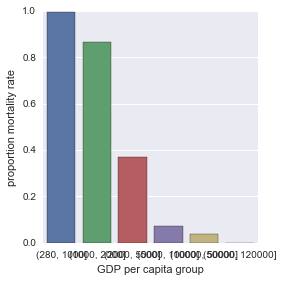

In [81]:
seaborn.factorplot(x= 'GDPGroup', y= 'Mortal', data= data2, kind= "bar", ci=None)
plt.xlabel('GDP per capita group')
plt.ylabel('proportion mortality rate')
plt.show()
# A categorical to categorical bar chart
# note that a bivariate graph displays a mean on the y-axis, 
# so categorical response variables should not have other than two levels, they should be coded as 1 and 0.
# Important: Below, the response variable gives us the proportion of the positive observations.

Rename the groups for better readability: 

In [82]:
def GDPRangeGroup (row):
   if row['GDP'] > 280.0 and row['GDP']<= 1000.0 :
      return 1
   if row['GDP'] > 1000.0 and row['GDP']<= 2000.0 :
      return 2
   if row['GDP'] > 2000.0 and row['GDP']<= 5000.0 :
      return 3
   if row['GDP'] > 5000.0 and row['GDP']<= 10000.0 :
      return 4
   if row['GDP'] > 10000.0 and row['GDP']<= 50000.0 :
      return 5
   if row['GDP'] > 50000.0 and row['GDP']<= 120000.0 :
      return 6

In [83]:
data2['GDPCat'] = data2.apply (lambda row: GDPRangeGroup (row),axis=1)

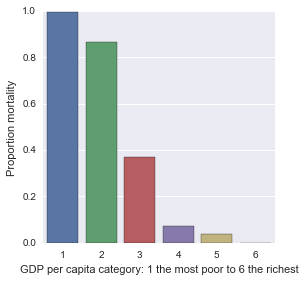

In [84]:
seaborn.factorplot(x= 'GDPCat', y= 'Mortal', data= data2, kind= "bar", ci=None)
plt.xlabel('GDP per capita category: 1 the most poor to 6 the richest')
plt.ylabel('Proportion mortality')
plt.show()

# PART II of the course

In [85]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

In [86]:
data3= data2[['GDPCat', 'Under_five_mortality']]
print(data3)

       GDPCat  Under_five_mortality
195         1                 135.6
196         1                 132.7
197         1                 129.4
198         1                 125.9
199         1                 122.4
200         1                 119.0
201         1                 115.8
202         1                 112.9
203         1                 110.2
204         2                 107.7
205         2                 105.2
206         2                 102.6
207         2                 100.0
208         2                  97.3
382         3                  26.1
383         3                  24.8
384         3                  23.6
385         3                  22.5
386         4                  21.4
387         4                  20.4
388         4                  19.5
389         4                  18.7
390         4                  17.9
391         4                  17.2
392         4                  16.5
393         4                  15.9
394         4               

## A) ANOVA 
### Please note that "GDPCat" is categorical, and  "Under_five_mortality" is numeric

In [87]:
model1= smf.ols(formula='Under_five_mortality ~ C(GDPCat)', data=data3)
# statsmodels.formula.api as smf
# ols: ordinary least squares regression
# first response var, and then explanatory variable. Note that C stands for the Categorical variable.

In [88]:
results= model1.fit()

In [89]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Under_five_mortality   R-squared:                       0.634
Model:                              OLS   Adj. R-squared:                  0.634
Method:                   Least Squares   F-statistic:                     936.8
Date:                  Thu, 28 Apr 2016   Prob (F-statistic):               0.00
Time:                          11:43:16   Log-Likelihood:                -12917.
No. Observations:                  2705   AIC:                         2.585e+04
Df Residuals:                      2699   BIC:                         2.588e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        127.002

### POST-HOC TESTS ARE NEEDED: Which categories are different than others?

In [90]:
mc1 = multi.MultiComparison(data3['Under_five_mortality'], data3['GDPCat'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  1      2     -35.6631  -42.2233  -29.1028  True 
  1      3     -75.7435  -81.9439  -69.5432  True 
  1      4     -99.6468 -105.8359  -93.4577  True 
  1      5    -115.2019 -120.9399  -109.464  True 
  1      6     -120.342 -136.6317 -104.0523  True 
  2      3     -40.0805  -45.5307  -34.6303  True 
  2      4     -63.9837  -69.4211  -58.5463  True 
  2      5     -79.5389  -84.4566  -74.6212  True 
  2      6     -84.6789 -100.6981  -68.6598  True 
  3      4     -23.9033  -28.9005  -18.906   True 
  3      5     -39.4584  -43.8847  -35.0321  True 
  3      6     -44.5985  -60.4736  -28.7233  True 
  4      5     -15.5552  -19.9657  -11.1447  True 
  4      6     -20.6952  -36.566   -4.8244   True 
  5      6      -5.14    -20.8404  10.5603  False 
--------------------------------------------------


### B) CHI SQUARE TEST OF INDEPENDENCE for CATEGORICAL TO CATEGORICAL VARIABLES

In [91]:
data4= data2[['Mortal', 'GDPCat']]
print(data4)

       Mortal  GDPCat
195         1       1
196         1       1
197         1       1
198         1       1
199         1       1
200         1       1
201         1       1
202         1       1
203         1       1
204         1       2
205         1       2
206         1       2
207         1       2
208         1       2
382         0       3
383         0       3
384         0       3
385         0       3
386         0       4
387         0       4
388         0       4
389         0       4
390         0       4
391         0       4
392         0       4
393         0       4
394         0       4
395         0       4
587         0       4
588         0       4
...       ...     ...
33032       1       3
33033       1       3
33227       1       2
33228       1       2
33229       1       2
33230       1       2
33231       1       2
33232       1       2
33233       1       2
33234       1       2
33235       1       2
33236       1       2
33237       1       2
33238     

In [92]:
# contingency table of observed counts
ct1=pd.crosstab(data4['Mortal'], data4['GDPCat'])
print (ct1) # ct1 is a two-dimentional array

GDPCat    1    2    3    4    5   6
Mortal                             
0         1   53  336  500  917  28
1       258  338  198   40   36   0


In [93]:
# column percentages
colsum=ct1.sum(axis=0) # axis=0 to sum all columns
colpct=ct1/colsum
print(colpct)

GDPCat         1        2         3         4         5    6
Mortal                                                      
0       0.003861  0.13555  0.629213  0.925926  0.962225  1.0
1       0.996139  0.86445  0.370787  0.074074  0.037775  0.0



#### We are trying to find out if the mortality rate among different GDP categories is the same or not. Therefore column percentages make sense. (Explanatory variables on each column)

In [94]:
import scipy.stats

In [95]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(1590.9193552803551, 0.0, 5, array([[ 175.6987061 ,  265.24399261,  362.25138632,  366.32162662,
         646.48983364,   18.99445471],
       [  83.3012939 ,  125.75600739,  171.74861368,  173.67837338,
         306.51016636,    9.00554529]]))


### Large X2 statistics and a small p-value states that there is a strong association between the explanatory variables and the response variables as opposed to the null hypothesis.

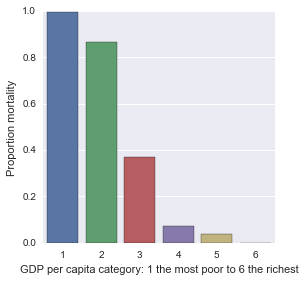

In [96]:
seaborn.factorplot(x= 'GDPCat', y= 'Mortal', data= data4, kind= "bar", ci=None)
plt.xlabel('GDP per capita category: 1 the most poor to 6 the richest')
plt.ylabel('Proportion mortality')
plt.show()
# note that the y values are equal to the column percentages (colpct) for Mortal 1

### POST-HOC TESTS ARE NEEDED:  Which GDP Categories are different than the others?
### chi square post hoc test: Apply chi square for each pair (all combinations of them); test with adjusted p value (bonferroni adjustment p-value: p-value / number_of_comparions)
Here, we have 6 groups and there are 15 pairs; so the adjusted p-value is 0.05/15= 0,0033

In [99]:
# We need to run chi-square tests for each of the comparisons
recode_1v2 = {1: 1, 2: 2} # this is required because we are going to use only these two columns
data4['GDP_1v2']= data4['GDPCat'].map(recode_1v2)

# contingency table of observed counts
table_1v2=pd.crosstab(data4['Mortal'], data4['GDP_1v2'])
print (table_1v2)

# column percentages
colsum=table_1v2.sum(axis=0)
colpct=table_1v2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v2= scipy.stats.chi2_contingency(table_1v2)
print (cs_1v2)

GDP_1v2  1.0  2.0
Mortal           
0          1   53
1        258  338
GDP_1v2       1.0      2.0
Mortal                    
0        0.003861  0.13555
1        0.996139  0.86445
chi-square value, p value, expected counts
(33.761222905711314, 6.2308543920268363e-09, 1, array([[  21.51692308,   32.48307692],
       [ 237.48307692,  358.51692308]]))


#### Now, we need to run the above test for each of the remaining paired comparisons!

In [101]:
recode_1v3 = {1: 1, 3: 3}
data4['GDP_1v3']= data4['GDPCat'].map(recode_1v3)

# contingency table of observed counts
table_1v3=pd.crosstab(data4['Mortal'], data4['GDP_1v3'])
print (table_1v3)

# column percentages
colsum=table_1v3.sum(axis=0)
colpct=table_1v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v3= scipy.stats.chi2_contingency(table_1v3)
print (cs_1v3)

GDP_1v3  1.0  3.0
Mortal           
0          1  336
1        258  198
GDP_1v3       1.0       3.0
Mortal                     
0        0.003861  0.629213
1        0.996139  0.370787
chi-square value, p value, expected counts
(276.55285748854328, 4.2345237162071559e-62, 1, array([[ 110.0668348,  226.9331652],
       [ 148.9331652,  307.0668348]]))


In [103]:
recode_1v4 = {1: 1, 4: 4}
data4['GDP_1v4']= data4['GDPCat'].map(recode_1v4)

# contingency table of observed counts
table_1v4=pd.crosstab(data4['Mortal'], data4['GDP_1v4'])
print (table_1v4)

# column percentages
colsum=table_1v4.sum(axis=0)
colpct=table_1v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v4= scipy.stats.chi2_contingency(table_1v4)
print (cs_1v4)

GDP_1v4  1.0  4.0
Mortal           
0          1  500
1        258   40
GDP_1v4       1.0       4.0
Mortal                     
0        0.003861  0.925926
1        0.996139  0.074074
chi-square value, p value, expected counts
(632.43277868513451, 1.4781410771883269e-139, 1, array([[ 162.40175219,  338.59824781],
       [  96.59824781,  201.40175219]]))


In [105]:
recode_1v5 = {1: 1, 5: 5}
data4['GDP_1v5']= data4['GDPCat'].map(recode_1v5)

# contingency table of observed counts
table_1v5=pd.crosstab(data4['Mortal'], data4['GDP_1v5'])
print (table_1v5)

# column percentages
colsum=table_1v5.sum(axis=0)
colpct=table_1v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v5= scipy.stats.chi2_contingency(table_1v5)
print (cs_1v5)

GDP_1v5  1.0  5.0
Mortal           
0          1  917
1        258   36
GDP_1v5       1.0       5.0
Mortal                     
0        0.003861  0.962225
1        0.996139  0.037775
chi-square value, p value, expected counts
(1012.8329442421266, 2.91651373673045e-222, 1, array([[ 196.17326733,  721.82673267],
       [  62.82673267,  231.17326733]]))


In [106]:
recode_1v6 = {1: 1, 6: 6}
data4['GDP_1v6']= data4['GDPCat'].map(recode_1v6)

# contingency table of observed counts
table_1v6=pd.crosstab(data4['Mortal'], data4['GDP_1v6'])
print (table_1v6)

# column percentages
colsum=table_1v6.sum(axis=0)
colpct=table_1v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_1v6= scipy.stats.chi2_contingency(table_1v6)
print (cs_1v6)

GDP_1v6  1.0  6.0
Mortal           
0          1   28
1        258    0
GDP_1v6       1.0  6.0
Mortal                
0        0.003861  1.0
1        0.996139  0.0
chi-square value, p value, expected counts
(265.17602222812229, 1.2773465624478754e-59, 1, array([[  26.17073171,    2.82926829],
       [ 232.82926829,   25.17073171]]))


In [107]:
recode_2v3 = {2: 2, 3: 3}
data4['GDP_2v3']= data4['GDPCat'].map(recode_2v3)

# contingency table of observed counts
table_2v3=pd.crosstab(data4['Mortal'], data4['GDP_2v3'])
print (table_2v3)

# column percentages
colsum=table_2v3.sum(axis=0)
colpct=table_2v3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v3= scipy.stats.chi2_contingency(table_2v3)
print (cs_2v3)

GDP_2v3  2.0  3.0
Mortal           
0         53  336
1        338  198
GDP_2v3      2.0       3.0
Mortal                    
0        0.13555  0.629213
1        0.86445  0.370787
chi-square value, p value, expected counts
(223.71824298597718, 1.3975588978663493e-50, 1, array([[ 164.43135135,  224.56864865],
       [ 226.56864865,  309.43135135]]))


In [108]:
recode_2v4 = {2: 2, 4: 4}
data4['GDP_2v4']= data4['GDPCat'].map(recode_2v4)

# contingency table of observed counts
table_2v4=pd.crosstab(data4['Mortal'], data4['GDP_2v4'])
print (table_2v4)

# column percentages
colsum=table_2v4.sum(axis=0)
colpct=table_2v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v4= scipy.stats.chi2_contingency(table_2v4)
print (cs_2v4)

GDP_2v4  2.0  4.0
Mortal           
0         53  500
1        338   40
GDP_2v4      2.0       4.0
Mortal                    
0        0.13555  0.925926
1        0.86445  0.074074
chi-square value, p value, expected counts
(584.17714457412023, 4.6288417662288226e-129, 1, array([[ 232.2481203,  320.7518797],
       [ 158.7518797,  219.2481203]]))


In [109]:
recode_2v5 = {2: 2, 5: 5}
data4['GDP_2v5']= data4['GDPCat'].map(recode_2v5)

# contingency table of observed counts
table_2v5=pd.crosstab(data4['Mortal'], data4['GDP_2v5'])
print (table_2v5)

# column percentages
colsum=table_2v5.sum(axis=0)
colpct=table_2v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v5= scipy.stats.chi2_contingency(table_2v5)
print (cs_2v5)

GDP_2v5  2.0  5.0
Mortal           
0         53  917
1        338   36
GDP_2v5      2.0       5.0
Mortal                    
0        0.13555  0.962225
1        0.86445  0.037775
chi-square value, p value, expected counts
(939.28616357450096, 2.8293135044904847e-206, 1, array([[ 282.19494048,  687.80505952],
       [ 108.80505952,  265.19494048]]))


In [110]:
recode_2v6 = {2: 2, 6: 6}
data4['GDP_2v6']= data4['GDPCat'].map(recode_2v6)

# contingency table of observed counts
table_2v6=pd.crosstab(data4['Mortal'], data4['GDP_2v6'])
print (table_2v6)

# column percentages
colsum=table_2v6.sum(axis=0)
colpct=table_2v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_2v6= scipy.stats.chi2_contingency(table_2v6)
print (cs_2v6)

GDP_2v6  2.0  6.0
Mortal           
0         53   28
1        338    0
GDP_2v6      2.0  6.0
Mortal               
0        0.13555  1.0
1        0.86445  0.0
chi-square value, p value, expected counts
(119.72461098668762, 7.2681644796105079e-28, 1, array([[  75.58711217,    5.41288783],
       [ 315.41288783,   22.58711217]]))


In [111]:
recode_3v4 = {3: 3, 4: 4}
data4['GDP_3v4']= data4['GDPCat'].map(recode_3v4)

# contingency table of observed counts
table_3v4=pd.crosstab(data4['Mortal'], data4['GDP_3v4'])
print (table_3v4)

# column percentages
colsum=table_3v4.sum(axis=0)
colpct=table_3v4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v4= scipy.stats.chi2_contingency(table_3v4)
print (cs_3v4)

GDP_3v4  3.0  4.0
Mortal           
0        336  500
1        198   40
GDP_3v4       3.0       4.0
Mortal                     
0        0.629213  0.925926
1        0.370787  0.074074
chi-square value, p value, expected counts
(135.3190311247611, 2.8116042546568773e-31, 1, array([[ 415.66480447,  420.33519553],
       [ 118.33519553,  119.66480447]]))


In [113]:
recode_3v5 = {3: 3, 5: 5}
data4['GDP_3v5']= data4['GDPCat'].map(recode_3v5)

# contingency table of observed counts
table_3v5=pd.crosstab(data4['Mortal'], data4['GDP_3v5'])
print (table_3v5)

# column percentages
colsum=table_3v5.sum(axis=0)
colpct=table_3v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v5= scipy.stats.chi2_contingency(table_3v5)
print (cs_3v5)

GDP_3v5  3.0  5.0
Mortal           
0        336  917
1        198   36
GDP_3v5       3.0       5.0
Mortal                     
0        0.629213  0.962225
1        0.370787  0.037775
chi-square value, p value, expected counts
(283.7111982382533, 1.1664883220250089e-63, 1, array([[ 449.96772024,  803.03227976],
       [  84.03227976,  149.96772024]]))


In [114]:
recode_3v6 = {3: 3, 6: 6}
data4['GDP_3v6']= data4['GDPCat'].map(recode_3v6)

# contingency table of observed counts
table_3v6=pd.crosstab(data4['Mortal'], data4['GDP_3v6'])
print (table_3v6)

# column percentages
colsum=table_3v6.sum(axis=0)
colpct=table_3v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_3v6= scipy.stats.chi2_contingency(table_3v6)
print (cs_3v6)

GDP_3v6  3.0  6.0
Mortal           
0        336   28
1        198    0
GDP_3v6       3.0  6.0
Mortal                
0        0.629213  1.0
1        0.370787  0.0
chi-square value, p value, expected counts
(14.445653495262242, 0.00014426239607655007, 1, array([[ 345.86476868,   18.13523132],
       [ 188.13523132,    9.86476868]]))


In [116]:
recode_4v5 = {4: 4, 5: 5}
data4['GDP_4v5']= data4['GDPCat'].map(recode_4v5)

# contingency table of observed counts
table_4v5=pd.crosstab(data4['Mortal'], data4['GDP_4v5'])
print (table_4v5)

# column percentages
colsum=table_4v5.sum(axis=0)
colpct=table_4v5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v5= scipy.stats.chi2_contingency(table_4v5)
print (cs_4v5)

GDP_4v5  4.0  5.0
Mortal           
0        500  917
1         40   36
GDP_4v5       4.0       5.0
Mortal                     
0        0.925926  0.962225
1        0.074074  0.037775
chi-square value, p value, expected counts
(8.6640274379673308, 0.0032455317595556639, 1, array([[ 512.51172137,  904.48827863],
       [  27.48827863,   48.51172137]]))


In [117]:
recode_4v6 = {4: 4, 6: 6}
data4['GDP_4v6']= data4['GDPCat'].map(recode_4v6)

# contingency table of observed counts
table_4v6=pd.crosstab(data4['Mortal'], data4['GDP_4v6'])
print (table_4v6)

# column percentages
colsum=table_4v6.sum(axis=0)
colpct=table_4v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_4v6= scipy.stats.chi2_contingency(table_4v6)
print (cs_4v6)

GDP_4v6  4.0  6.0
Mortal           
0        500   28
1         40    0
GDP_4v6       4.0  6.0
Mortal                
0        0.925926  1.0
1        0.074074  0.0
chi-square value, p value, expected counts
(1.2431261022927693, 0.26486942716567941, 1, array([[ 501.97183099,   26.02816901],
       [  38.02816901,    1.97183099]]))


In [118]:
recode_5v6 = {5: 5, 6: 6}
data4['GDP_5v6']= data4['GDPCat'].map(recode_5v6)

# contingency table of observed counts
table_5v6=pd.crosstab(data4['Mortal'], data4['GDP_5v6'])
print (table_5v6)

# column percentages
colsum=table_5v6.sum(axis=0)
colpct=table_5v6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs_5v6= scipy.stats.chi2_contingency(table_5v6)
print (cs_5v6)

GDP_5v6  5.0  6.0
Mortal           
0        917   28
1         36    0
GDP_5v6       5.0  6.0
Mortal                
0        0.962225  1.0
1        0.037775  0.0
chi-square value, p value, expected counts
(0.28940396331670137, 0.5906027379518598, 1, array([[ 918.02752294,   26.97247706],
       [  34.97247706,    1.02752294]]))


### A table showing the p-values obtained for each group should be drawn as shown below:

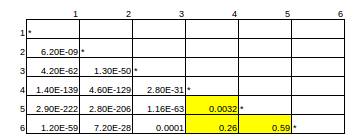

In [272]:
from IPython.display import Image
Image("table1.png")

## C) PEARSON CORRELATION BETWEEN TWO NUMERIC VARIABLES: